In [1]:
import chainer
import chainer.links as L
import chainer.functions as F
from chainer import optimizers, Chain,Variable
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
DATA_NUM = 1000

In [3]:
# create data
train_x = []
train_y = []

train_x = np.linspace(-np.pi,np.pi,DATA_NUM)
train_y = -1.0*10*np.sin(train_x)+1.2*np.exp(train_x)

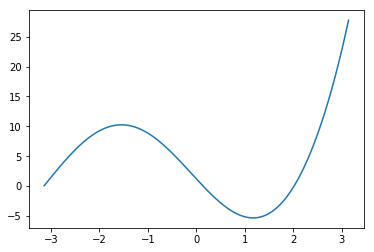

In [4]:
# plot data
#plt.plot(x_data,y_data,label='Sample data')
plt.plot(train_x,train_y,label='Sample data')
plt.savefig("kansuu.png")
plt.show()

In [5]:
def get_batch(n_data, n_batch):
    x = []
    y = []
    for b in range(n_batch):
        index = random.randrange(n_data)
        x_ = train_x[index]
        y_ = train_y[index]
        x.append(x_)
        y.append(y_)
    return x,y

In [6]:
class MyChain(Chain):
    def __init__(self):
        super(MyChain, self).__init__(
            l1 = L.Linear(1, 15),
            l2 = L.Linear(15, 10),
            l3 = L.Linear(10,1)
        )
    def __call__(self,x, y):
        return F.mean_squared_error(self.predict(x),y)
    def predict(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        h3 = self.l3(h2)
        return h3
    def get_predict(self,x):
        return self.predict(Variable(np.array(x,dtype=np.float32).reshape(len(x),1))).data

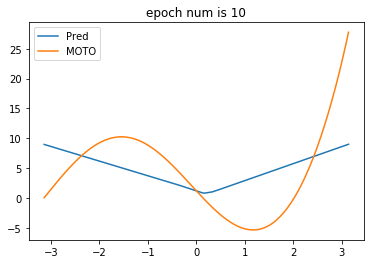

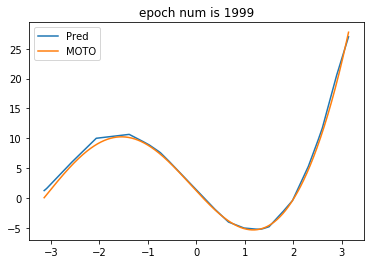

<Figure size 432x288 with 0 Axes>

In [13]:
if __name__=="__main__":
    
    model = MyChain()
    optimizer = optimizers.SGD()
    optimizer.setup(model)
    
    losses = []
    E_NUM = 2000
    BATCH_NUM = 300
    for epoch in range(E_NUM):
        x,y = get_batch(DATA_NUM,BATCH_NUM)
        x_ = Variable(np.array(x,dtype=np.float32).reshape(BATCH_NUM,1))
        y_ = Variable(np.array(y,dtype=np.float32).reshape(BATCH_NUM,1))
        #print(x_)
        
        model.zerograds()
        loss = model(x_,y_)
        loss.backward()
        optimizer.update()
        
        losses.append(loss.data)
        if epoch in [10, E_NUM-1]:
            test_x =  np.linspace(-np.pi,np.pi,DATA_NUM)
            test_y = model.get_predict(test_x)
            #print(test_y)
            plt.plot(test_x, test_y, label='Pred')
            plt.plot(train_x, train_y, label='MOTO')
            title = 'epoch num is '+ str(epoch)
            plt.title(title)
            plt.legend()
            plt.savefig("fig_epoch{}.png".format(epoch))
            plt.show()
            plt.clf()

(0, 5)

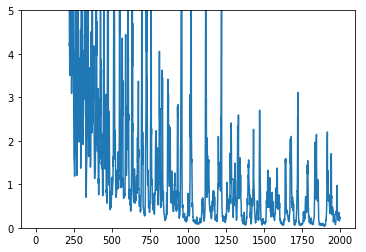

In [8]:
plt.plot(losses)
plt.ylim(0,5)